In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/archive/UrbanSound8K.csv")

In [ ]:
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
from librosa import display
import librosa

In [ ]:

#feature set
#This file is of a dog bark
y,sr=librosa.load("/content/drive/MyDrive/archive/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,mfccs.shape

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=219
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=110
  n_fft, y.shape[-1]


((40, 14), (40, 14), (36, 14), (40, 14))

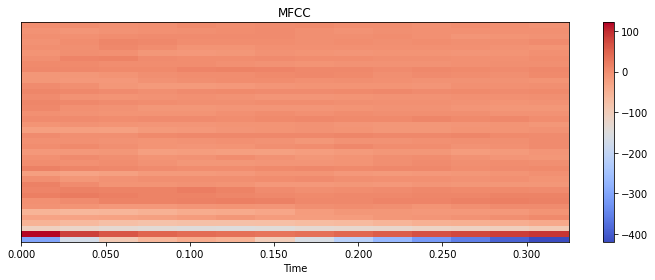

In [ ]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

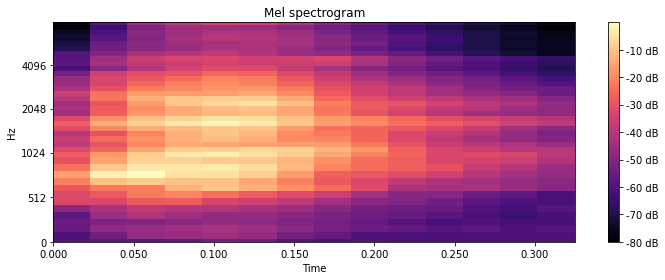

In [ ]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

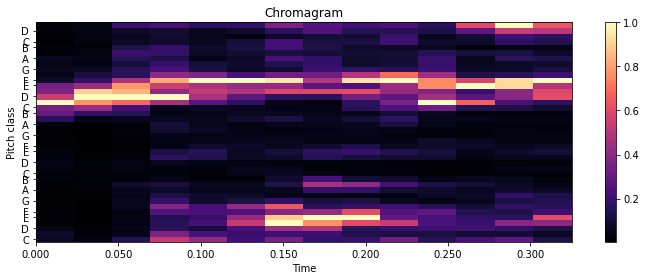

In [ ]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

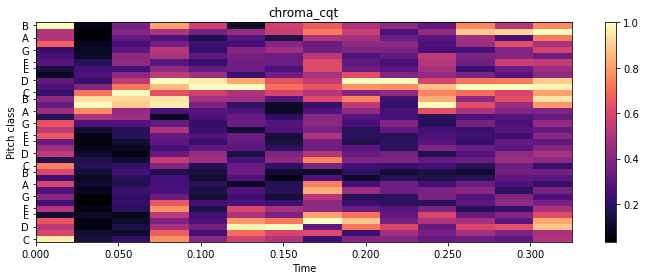

In [ ]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

In [ ]:
#feature set
y,sr=librosa.load("/content/drive/MyDrive/archive/fold5/100263-2-0-117.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((36,), (36,), (36,), (36,), (36,))

In [ ]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
features.shape

(36, 5)

In [ ]:
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="/content/drive/MyDrive/archive/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

  0%|          | 0/8732 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=219
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=110
  n_fft, y.shape[-1]
  0%|          | 9/8732 [00:09<2:36:54,  1.08s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=894
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input sign

In [ ]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 36, 5), (837, 36, 5), (7895,), (837,))

In [ ]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 180), (837, 180))

In [ ]:

#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [ ]:
#downloading the saved data from colab's server
from google.colab import files

files.download("train_data.csv")
files.download("test_data.csv")
files.download("train_labels.csv")
files.download("test_labels.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [ ]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 180), (837, 180), (7895,), (837,))

In [ ]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [ ]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 36,5))
x_test=np.reshape(x_test,(x_test.shape[0], 36,5))
x_train.shape,x_test.shape

((7895, 36, 5), (837, 36, 5))

In [ ]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 36,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 36,5,1))

In [ ]:
#shapes
x_train.shape,x_test.shape

((7895, 36, 5, 1), (837, 36, 5, 1))

In [ ]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
model=Sequential()

model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(36,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#training the model
model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
158/158 [==============================] - 21s 123ms/step - loss: 2.0414 - accuracy: 0.2864 - val_loss: 1.6400 - val_accuracy: 0.4325
Epoch 2/30
158/158 [==============================] - 21s 130ms/step - loss: 1.4662 - accuracy: 0.4898 - val_loss: 1.2430 - val_accuracy: 0.5878
Epoch 3/30
158/158 [==============================] - 20s 126ms/step - loss: 1.1105 - accuracy: 0.6201 - val_loss: 1.1074 - val_accuracy: 0.6798
Epoch 4/30
158/158 [==============================] - 19s 120ms/step - loss: 0.9474 - accuracy: 0.6709 - val_loss: 1.0278 - val_accuracy: 0.6428
Epoch 5/30
158/158 [==============================] - 19s 121ms/step - loss: 0.7985 - accuracy: 0.7296 - val_loss: 1.0469 - val_accuracy: 0.6750
Epoch 6/30
158/158 [==============================] - 19s 121ms/step - loss: 0.7336 - accuracy: 0.7564 - val_loss: 1.0977 - val_accuracy: 0.6559
Epoch 7/30
158/158 [==============================] - 19s 121ms/step - loss: 0.6602 - accuracy: 0.7843 - val_loss: 1.0881 - val_ac

In [ ]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

27/27 [==============================] - 1s 20ms/step - loss: 1.1884 - accuracy: 0.7252
[0.165850430727005, 0.9556681513786316]
[1.188427448272705, 0.7252090573310852]


In [ ]:
history = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
158/158 [==============================] - 21s 125ms/step - loss: 2.0093 - accuracy: 0.2928 - val_loss: 1.5805 - val_accuracy: 0.4325
Epoch 2/30
158/158 [==============================] - 19s 122ms/step - loss: 1.4981 - accuracy: 0.4738 - val_loss: 1.3974 - val_accuracy: 0.4779
Epoch 3/30
158/158 [==============================] - 19s 122ms/step - loss: 1.1819 - accuracy: 0.5932 - val_loss: 1.1192 - val_accuracy: 0.6452
Epoch 4/30
158/158 [==============================] - 20s 126ms/step - loss: 0.9698 - accuracy: 0.6683 - val_loss: 1.0592 - val_accuracy: 0.6679
Epoch 5/30
158/158 [==============================] - 19s 120ms/step - loss: 0.8404 - accuracy: 0.7145 - val_loss: 1.0011 - val_accuracy: 0.7013
Epoch 6/30
158/158 [==============================] - 19s 121ms/step - loss: 0.7521 - accuracy: 0.7490 - val_loss: 1.0119 - val_accuracy: 0.6750
Epoch 7/30
158/158 [==============================] - 19s 122ms/step - loss: 0.6523 - accuracy: 0.7818 - val_loss: 1.0067 - val_ac

In [ ]:
import matplotlib.pyplot as plt

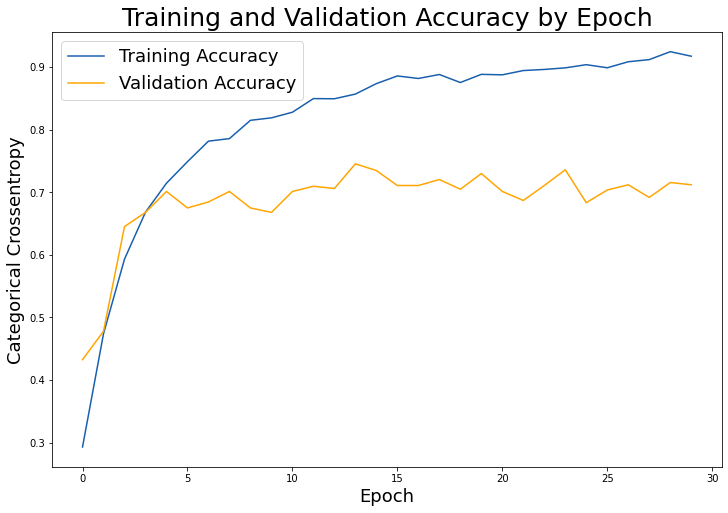

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,35,5), range(0,35,5))

plt.legend(fontsize = 18);